<a href="https://colab.research.google.com/github/VysePresident/4Sight_XRStarterKit/blob/main/MATH_4322_Team_25_Heart_Disease_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Set up our data and libraries
df = read.csv("heart.csv", header=TRUE)
install.packages
install.packages("tree")
library(tree)

# Seed for reproducible results
set.seed(123)

# Splitting data into training and testing sets
train_index = sample(nrow(df), round(nrow(df) * 0.8))
train_data = df[train_index, ]
test_data = df[-train_index, ]

function (pkgs, lib, repos = getOption("repos"), contriburl = contrib.url(repos, 
    type), method, available = NULL, destdir = NULL, dependencies = NA, 
    type = getOption("pkgType"), configure.args = getOption("configure.args"), 
    configure.vars = getOption("configure.vars"), clean = FALSE, 
    Ncpus = getOption("Ncpus", 1L), verbose = getOption("verbose"), 
    libs_only = FALSE, INSTALL_opts, quiet = FALSE, keep_outputs = FALSE, 
    ...) 
{
    if (!is.character(type)) 
        stop("invalid 'type'; must be a character string")
    type2 <- .Platform$pkgType
    if (type == "binary") {
        if (type2 == "source") 
            stop("type 'binary' is not supported on this platform")
        else type <- type2
        if (type == "both" && (!missing(contriburl) || !is.null(available))) 
            stop("specifying 'contriburl' or 'available' requires a single type, not type = \"both\"")
    }
    if (is.logical(clean) && clean) 
        clean <- "--clean"
    if (is.logical(dependencies) && is.na(dependencies)) 
        dependencies <- if (!missing(lib) && length(lib) > 1L) 
            FALSE
        else c("Depends", "Imports", "LinkingTo")
    get_package_name <- function(pkg) {
        gsub("_[.](zip|tar[.]gz|tar[.]bzip2|tar[.]xz)", "", gsub(.standard_regexps()$valid_package_version, 
            "", basename(pkg)))
    }
    getConfigureArgs <- function(pkg) {
        if (.Platform$OS.type == "windows") 
            return(character())
        if (length(pkgs) == 1L && length(configure.args) && length(names(configure.args)) == 
            0L) 
            return(paste0("--configure-args=", shQuote(paste(configure.args, 
                collapse = " "))))
        pkg <- get_package_name(pkg)
        if (length(configure.args) && length(names(configure.args)) && 
            pkg %in% names(configure.args)) 
            config <- paste0("--configure-args=", shQuote(paste(configure.args[[pkg]], 
                collapse = " ")))
        else config <- character()
        config
    }
    getConfigureVars <- function(pkg) {
        if (.Platform$OS.type == "windows") 
            return(character())
        if (length(pkgs) == 1L && length(configure.vars) && length(names(configure.vars)) == 
            0L) 
            return(paste0("--configure-vars=", shQuote(paste(configure.vars, 
                collapse = " "))))
        pkg <- get_package_name(pkg)
        if (length(configure.vars) && length(names(configure.vars)) && 
            pkg %in% names(configure.vars)) 
            config <- paste0("--configure-vars=", shQuote(paste(configure.vars[[pkg]], 
                collapse = " ")))
        else config <- character()
        config
    }
    get_install_opts <- function(pkg) {
        if (!length(INSTALL_opts)) 
            character()
        else paste(INSTALL_opts[[get_package_name(pkg)]], collapse = " ")
    }
    if (missing(pkgs)) {
        if (!interactive()) 
            stop("no packages were specified")
        if (.Platform$OS.type == "windows" || .Platform$GUI == 
            "AQUA" || (capabilities("tcltk") && capabilities("X11") && 
            suppressWarnings(tcltk::.TkUp))) {
        }
        else stop("no packages were specified")
        if (is.null(available)) {
            av <- available.packages(contriburl = contriburl, 
                method = method, ...)
            if (missing(repos)) 
                repos <- getOption("repos")
            if (type != "both") 
                available <- av
        }
        else av <- available
        if (NROW(av)) {
            pkgs <- select.list(sort(unique(rownames(av))), multiple = TRUE, 
                title = "Packages", graphics = TRUE)
        }
    }
    if (.Platform$OS.type == "windows" && length(pkgs)) {
        pkgnames <- get_package_name(pkgs)
        inuse <- search()
        inuse <- sub("^package:", "", inuse[grep("^package:", 
            inuse)])
        inuse <- pkgnames %in% inuse
        if (any(inuse)) {
           

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Install required libraries for confusion matrices if necessary
install.packages('caret')


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [ ]:
library(caret)

Loading required package: ggplot2

Loading required package: lattice



In [ ]:
#Check variable type for each column and convert categorical variable to the appropriate type
str(df)

'data.frame':	1025 obs. of  14 variables:
 $ age     : int  52 53 70 61 62 58 58 55 46 54 ...
 $ sex     : int  1 1 1 1 0 0 1 1 1 1 ...
 $ cp      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ trestbps: int  125 140 145 148 138 100 114 160 120 122 ...
 $ chol    : int  212 203 174 203 294 248 318 289 249 286 ...
 $ fbs     : int  0 1 0 0 1 0 0 0 0 0 ...
 $ restecg : int  1 0 1 1 1 0 2 0 0 0 ...
 $ thalach : int  168 155 125 161 106 122 140 145 144 116 ...
 $ exang   : int  0 1 1 0 0 0 0 1 0 1 ...
 $ oldpeak : num  1 3.1 2.6 0 1.9 1 4.4 0.8 0.8 3.2 ...
 $ slope   : int  2 0 0 2 1 1 0 1 2 1 ...
 $ ca      : int  2 0 0 1 3 0 3 1 0 2 ...
 $ thal    : int  3 3 3 3 2 2 1 3 3 2 ...
 $ target  : int  0 0 0 0 0 1 0 0 0 0 ...


In [ ]:
df$sex <- as.factor(df$sex)
df$cp <- as.factor(df$cp)
df$restecg  <- as.factor(df$restecg)
df$exang <- as.factor(df$exang)
df$target <- as.factor(df$target)

#<b>Logistic Regression Model</b>

# **Data Preparation**

###LR Model Fitting

In [ ]:

set.seed(123) #set seed
sample = sample.int(n = nrow(df),size = round(.80*nrow(df)),
                    replace = FALSE)
head(sample)
train = df[sample,]
test = df[-sample,]
dim(train)
dim(test)
summary(df)

[1] 415 463 179 526 195 938

[1] 820  14

[1] 205  14

      age        sex     cp         trestbps          chol          fbs        
 Min.   :29.00   0:312   0:497   Min.   : 94.0   Min.   :126   Min.   :0.0000  
 1st Qu.:48.00   1:713   1:167   1st Qu.:120.0   1st Qu.:211   1st Qu.:0.0000  
 Median :56.00           2:284   Median :130.0   Median :240   Median :0.0000  
 Mean   :54.43           3: 77   Mean   :131.6   Mean   :246   Mean   :0.1493  
 3rd Qu.:61.00                   3rd Qu.:140.0   3rd Qu.:275   3rd Qu.:0.0000  
 Max.   :77.00                   Max.   :200.0   Max.   :564   Max.   :1.0000  
 restecg    thalach      exang      oldpeak          slope      
 0:497   Min.   : 71.0   0:680   Min.   :0.000   Min.   :0.000  
 1:513   1st Qu.:132.0   1:345   1st Qu.:0.000   1st Qu.:1.000  
 2: 15   Median :152.0           Median :0.800   Median :1.000  
         Mean   :149.1           Mean   :1.072   Mean   :1.385  
         3rd Qu.:166.0           3rd Qu.:1.800   3rd Qu.:2.000  
         Max.   :202.0           Max.   :6.200   M

First, we will create a correlation matrix to find multicollinearity between attributes.  Because logistic models struggle with multicollinearity, we want to avoid this as much as possible.

In [ ]:
temp_df = read.csv("heart.csv", header=TRUE)
correlation_matrix <- cor(temp_df)
print(correlation_matrix)

                 age         sex          cp    trestbps        chol
age       1.00000000 -0.10324030 -0.07196627  0.27112141  0.21982253
sex      -0.10324030  1.00000000 -0.04111909 -0.07897377 -0.19825787
cp       -0.07196627 -0.04111909  1.00000000  0.03817742 -0.08164102
trestbps  0.27112141 -0.07897377  0.03817742  1.00000000  0.12797743
chol      0.21982253 -0.19825787 -0.08164102  0.12797743  1.00000000
fbs       0.12124348  0.02720046  0.07929359  0.18176662  0.02691716
restecg  -0.13269617 -0.05511721  0.04358061 -0.12379409 -0.14741024
thalach  -0.39022708 -0.04936524  0.30683928 -0.03926407 -0.02177209
exang     0.08816338  0.13915681 -0.40151271  0.06119697  0.06738223
oldpeak   0.20813668  0.08468656 -0.17473348  0.18743411  0.06488031
slope    -0.16910511 -0.02666629  0.13163278 -0.12044531 -0.01424787
ca        0.27155053  0.11172891 -0.17620647  0.10455372  0.07425934
thal      0.07229745  0.19842425 -0.16334148  0.05927618  0.10024418
target   -0.22932355 -0.27950076  

We see that there are no cases of extreme collinearity, though there are several instances of moderate collinearity.  

Next, we will attempt to determine which variables are the most important predictors, removing the ones that are not significant.

In [ ]:
df.glm = glm(target ~ age + sex + cp + trestbps + chol + fbs + restecg + thalach + exang + oldpeak + slope + ca + 
                      thal, family = "binomial", data = df)
summary(df.glm)


Call:
glm(formula = target ~ age + sex + cp + trestbps + chol + fbs + 
    restecg + thalach + exang + oldpeak + slope + ca + thal, 
    family = "binomial", data = df)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.331916   1.408782   2.365  0.01803 *  
age         -0.006585   0.012708  -0.518  0.60434    
sex1        -1.857371   0.261509  -7.102 1.23e-12 ***
cp1          1.257640   0.292121   4.305 1.67e-05 ***
cp2          2.052676   0.250953   8.180 2.85e-16 ***
cp3          2.117652   0.342580   6.181 6.35e-10 ***
trestbps    -0.016027   0.005683  -2.820  0.00480 ** 
chol        -0.006042   0.002093  -2.887  0.00389 ** 
fbs         -0.153445   0.290148  -0.529  0.59691    
restecg1     0.444248   0.197198   2.253  0.02427 *  
restecg2    -0.463225   1.203507  -0.385  0.70031    
thalach      0.022721   0.005726   3.968 7.24e-05 ***
exang1      -0.895648   0.228501  -3.920 8.87e-05 ***
oldpeak     -0.514611   0.119397  -4.310 1.63e-05 ***
slope

We observe that fbs and age do not appear to be significant factors in whether or not the patient has heart disease.

We will attempt to recreate the model without these factors.

In [ ]:
df.glm2 = glm(target ~ sex + cp + trestbps + chol + restecg + thalach + exang + oldpeak + slope + ca + 
                      thal, family = "binomial", data = df)
summary(df.glm2)


Call:
glm(formula = target ~ sex + cp + trestbps + chol + restecg + 
    thalach + exang + oldpeak + slope + ca + thal, family = "binomial", 
    data = df)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.933994   1.159973   2.529  0.01143 *  
sex1        -1.850717   0.258871  -7.149 8.73e-13 ***
cp1          1.242946   0.291560   4.263 2.02e-05 ***
cp2          2.026914   0.245551   8.255  < 2e-16 ***
cp3          2.083474   0.339003   6.146 7.95e-10 ***
trestbps    -0.017104   0.005490  -3.115  0.00184 ** 
chol        -0.006289   0.002067  -3.043  0.00234 ** 
restecg1     0.458073   0.196165   2.335  0.01954 *  
restecg2    -0.463455   1.227595  -0.378  0.70578    
thalach      0.023798   0.005247   4.535 5.76e-06 ***
exang1      -0.900885   0.227173  -3.966 7.32e-05 ***
oldpeak     -0.508188   0.118726  -4.280 1.87e-05 ***
slope        0.541648   0.190114   2.849  0.00438 ** 
ca          -0.781662   0.103492  -7.553 4.26e-14 ***
thal        -0.85

We observe a very slight, mixed result in the model, as the AIC has lowered slightly will the Residual Deviance had a minimal increase. Null Deviance remain the same.  We then experiment to see if removing the least significant variables might help or not.

In [ ]:
df.glm3 = glm(target ~ sex + cp + trestbps + chol + thalach + exang + oldpeak + slope + ca + 
                      thal, family = "binomial", data = df)
summary(df.glm3)


Call:
glm(formula = target ~ sex + cp + trestbps + chol + thalach + 
    exang + oldpeak + slope + ca + thal, family = "binomial", 
    data = df)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.290242   1.137664   2.892 0.003827 ** 
sex1        -1.864874   0.255455  -7.300 2.87e-13 ***
cp1          1.256912   0.292130   4.303 1.69e-05 ***
cp2          2.016058   0.244318   8.252  < 2e-16 ***
cp3          2.037787   0.336181   6.062 1.35e-09 ***
trestbps    -0.018227   0.005416  -3.365 0.000764 ***
chol        -0.007132   0.002012  -3.545 0.000393 ***
thalach      0.024809   0.005247   4.728 2.26e-06 ***
exang1      -0.873477   0.226362  -3.859 0.000114 ***
oldpeak     -0.500418   0.116118  -4.310 1.64e-05 ***
slope        0.563742   0.187514   3.006 0.002644 ** 
ca          -0.779690   0.103444  -7.537 4.80e-14 ***
thal        -0.828968   0.150872  -5.495 3.92e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion p

The model becomes slightly worse when we remove the least significant variable. There is a very minor increase in both residual deviance and AIC, indicating that this model is less effective.  We will use the second model as our base model now.

Thus our new formula is: 

df.glm = glm(target ~ sex + cp + trestbps + chol + restecg + thalach + exang + oldpeak + slope + ca + thal, family = "binomial", data = df)

###TRAINING LOGISTIC REGRESSION MODEL

Now that we have decided which predictors may be most useful in our model, we will train the model repeatedly and validate it with a separate testing set so that we can numerically determine the quality of our model. 

We will split the data into training and validation sets at a ratio of 80/20, respectively. To minimize the influence of randomness on the final results, we will repeat this process 10 times with different splits and take the average of these results. 

In [ ]:
samples = list()
for (i in 1:10) {
  sample = sample.int(n = nrow(df), size=round(.8*nrow(df)), replace = FALSE)
  samples[[i]] = sample
}

samples

[[1]]
  [1]  488  814  265  591  913  647  478  904  321    9  867  281  642  907  708
 [16]   40  148  651   18  950  398  963  348   67  878  732  605  383  551  151
 [31] 1022  471  344  168  161  421  444   29  633  241  966  665   42  922   44
 [46]  224    8  912  997  352  833  862  826  217  696  683  451   56  278  401
 [61]  468  611  654  229  375  576  242  280  734  520  660  888   74   86  434
 [76]   17  649  163  485  469  447  185  656  820  474  355   35  538  781   36
 [91]  687  503  409   28  669  812  310  153  285 1009   93  269  717  675  372
[106]  517  968   77  994 1003  684  584  126  422  152  720   75  599  606  480
[121]  304  783  975  694  778  952  983  100   25 1012  180  293  539  713  211
[136]  547  703  343   76  207  433  291  931  839  366   34  381  201  815  641
[151]  266  681  425   39  959  504  215  103  592  858  400    2  674   78  158
[166]  156  869  698  286  729  423  326  707  430  699  115  750  560  650  540
[181]  716  754  835  385  981  885  991  164  850  335  918  174  896  631  658
[196]  951  615  282  420  804  919  515  972  523   51  784   11  230  976  223
[211]  613  145  645  627  836  243  608  318  419  603  945  601  143  635  884
[226]  542  162  581  130  208 1025  535  917  728  789  275  723  891  197  685
[241]  910  487  544   48  666  939  567  415  911  529  327  441  807  186  639
[256]  537  988  693  528  874  240 1016  894  929  726  849  748  470  536  861
[271]  621  702  628  367  816  679  962   72  239  432 1017  996   26   46  794
[286]  751  889  337  256  872  775   45  303  332   96  686  467   83  985  949
[301]  755  382  159  678  289  914  813  202  916  549  852  792  144    6  895
[316]   89  462   95  264  171    5  142  449  940    4  780  238  210  524  640
[331]  746  828  204  749  957  853  339  358   32  258 1024  788   69  349  477
[346]  558  697  312    1  638  498   52  519  787  394  292  392  255   49  479
[361]  970 1000  671  221  380  733  704   71  458  373  403  622  435  363  564
[376]  165  881 1007  745  424  657  346  530  453  700  198   54   73  967   20
[391]  175  114 1005  541  636  465  236  179  924  887   92  428  492  267   19
[406]  819   63  356  406  155  730  252  390  228  506  782  724  196  389 1011
[421]  251  137  689  860  572  662 1006  445  553  770  747  664  510  863 1004
[436] 1001  964  993  806  545  248  908  456  643  102  831  359  396  489   80
[451]  227  533  932  827  154   90  277  376   12  623  141  586  777  764  817
[466]  384  287   60  374  407  718  167  306  870  132  753  948  290  484  965
[481]  762  818  323  213  309  646  261  856  566  761  786  766  737   98  776
[496]  189  995  270  360  882  138  205  801  104  187   33  851  118  955   14
[511]  840  413  978  629  790  569  667  262  325  986  216  254  892  457  652
[526]  692  334  127  190  984  491  120   30  808  429  116   68  577  731  625
[541]  946  711   70  298  276  999  630  909  296  405  500  980   58  714  299
[556]  257  799  626  987 1002  905  832  574  570  977  701  218  739  823  253
[571]   81  800  936  741  855  249   59  496  600  604  559  971  297  901  876
[586]  676  305  906  513   82  727  333  364  802  925  234  632  272  803  347
[601]  150  136 1020  214  989  893  562  598  466  935  495   23  436  314  556
[616]  837 1014  294  493  166  461  209  921  483  571  736  561 1021  231  331
[631]  149  353  410  328  785  661  350  499  135  195  505  886  958   87  377
[646]  742   27  509  846  225  342  532  843  915  903  464  157  184  246  446
[661]  796  454  568  668  378  899  139   65  354  203  113  596  871  740  516
[676]  232  588   37  431  525  361 1015  873  172  362  531  274  982  140  199
[691]  834  191  439  854  411  990  670  181  369  763  582  182  183  877  821
[706]  416  947  848  875  973  543  589  122  634  797  341  579  101  455  673
[721]   99  944  418  969  226  391  393  313  521  772  900  320  798  522  124
[736]  129  580  721 1013

In [ ]:
# average_error_rate = 0
accuracies = list()
sensitivites = list()
specificities = list()
error_rates = list()
accuracies = list()

for (i in 1:10) {
  sample = samples[i]
  train = df[unlist(sample), ]
  test = df[-unlist(sample), ]
  train.glm = glm(target ~ sex + cp + trestbps + chol + restecg + thalach + exang + oldpeak + slope + ca + 
                      thal, family = "binomial", data = train)
  
  predicted_probs = predict(train.glm, newdata = test, type = "response")
  predicted_labels = ifelse(predicted_probs > 0.5, 1, 0)
  confusion_matrix = table(predicted_labels, test$target)
  print(confusion_matrix)


  accuracies[[i]] <- sum(diag(confusion_matrix)) / sum(confusion_matrix)
  sensitivites[[i]] <- confusion_matrix[2,2] / (confusion_matrix[2,2] + confusion_matrix[2,1])
  specificities[[i]] <- confusion_matrix[1,1] / (confusion_matrix[1,1] + confusion_matrix[1,2])
  error_rates[[i]] <- (confusion_matrix[1,2] + confusion_matrix[2,1]) / sum(confusion_matrix)
  accuracies[[i]] <- 1 - error_rates[[i]]
}

print("Accuracies")
print(unlist(accuracies))
print("Sensitivities")
print(unlist(sensitivites))
print("Specificities")
print(unlist(specificities))
print("Error Rates")
print(unlist(error_rates))
print("Accuracies")
print(unlist(accuracies))

print("Average Error Rate")
print(sum(unlist(error_rates)) / 10)
print("Average Accuracy")
print(sum(unlist(accuracies)) / 10)

                
predicted_labels  0  1
               0 83 10
               1 17 95
                
predicted_labels  0  1
               0 78 14
               1 24 89
                
predicted_labels  0  1
               0 76 18
               1 17 94
                
predicted_labels  0  1
               0 79 15
               1 12 99
                
predicted_labels  0  1
               0 82  9
               1 23 91
                
predicted_labels  0  1
               0 82 16
               1 17 90
                
predicted_labels  0  1
               0 76 13
               1 22 94
                
predicted_labels  0  1
               0 69 14
               1 23 99
                
predicted_labels  0  1
               0 74 10
               1 23 98
                
predicted_labels  0  1
               0 70 14
               1 29 92
[1] "Accuracies"
 [1] 0.8682927 0.8146341 0.8292683 0.8682927 0.8439024 0.8390244 0.8292683
 [8] 0.8195122 0.8390244 0.7902439
[1] "Sensitiv

As seen, the error rates for the 10 experiments vary considerably, but the average prediction success rate was ~83% - indicating the model is reasonably performant.

In [ ]:
# Predictions and confusion matrix
predicted_probs <- predict(train.glm, newdata = test, type = "response")
predicted_labels <- ifelse(predicted_probs > 0.5, 1, 0)
confusion_matrix <- table(predicted_labels, test$target)

print(confusion_matrix)

                
predicted_labels  0  1
               0 70 14
               1 29 92


In [ ]:
accuracy <- sum(diag(confusion_matrix)) / sum(confusion_matrix)
sensitivity <- confusion_matrix[2,2] / (confusion_matrix[2,2] + confusion_matrix[2,1])
specificity <- confusion_matrix[1,1] / (confusion_matrix[1,1] + confusion_matrix[1,2])
error_rate <- (confusion_matrix[1,2] + confusion_matrix[2,1]) / sum(confusion_matrix)

cat("Accuracy:", round(accuracy, 4), "\n")
cat("Sensitivity:", round(sensitivity, 4), "\n")
cat("Specificity:", round(specificity, 4), "\n")
cat("Error Rate:", round(error_rate, 4), "\n")

Accuracy: 0.7902 
Sensitivity: 0.7603 
Specificity: 0.8333 
Error Rate: 0.2098 


We observe that we have a moderately high accuracy rate of ~88.78%.  Notably, the specificity is moderately higher than the sensitivity, indicating that the model is better at correctly predicting negative values than positive ones.

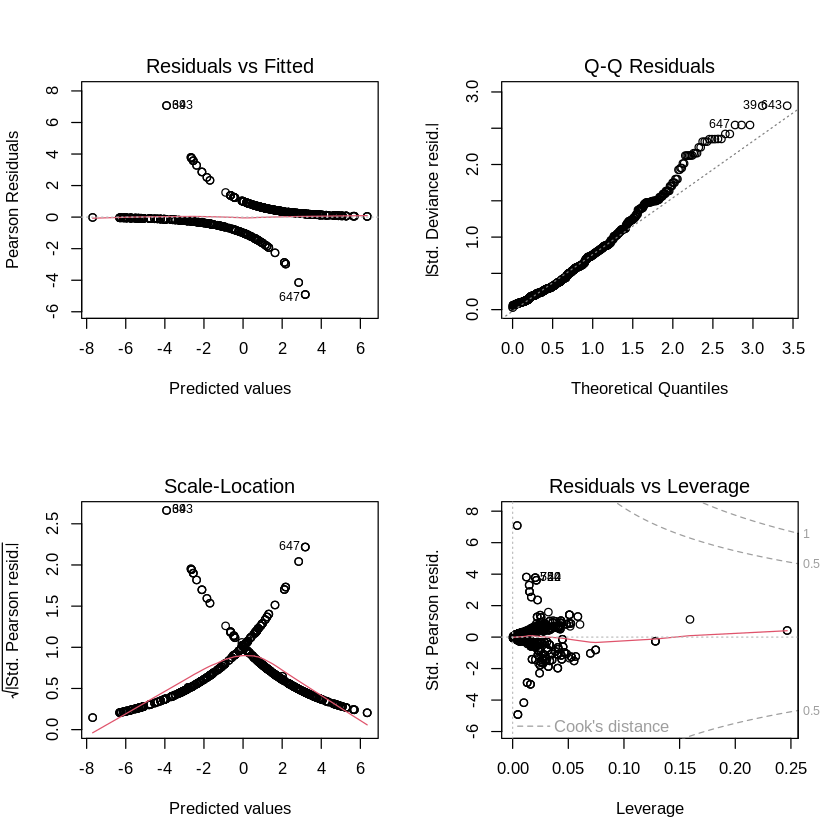

In [ ]:
# Diagnostic plotting

par(mfrow=c(2,2)) # Change the panel layout to 2 x 2
plot(train.glm)

In [ ]:
# Visualize Confusion Matrix:
install.packages("caret")
library(caret)
visual_confusion_matrix <- confusionMatrix(test$target, predicted_labels)
plot(visual_confusion_matrix)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



ERROR: ignored

# **Decision Tree Model**

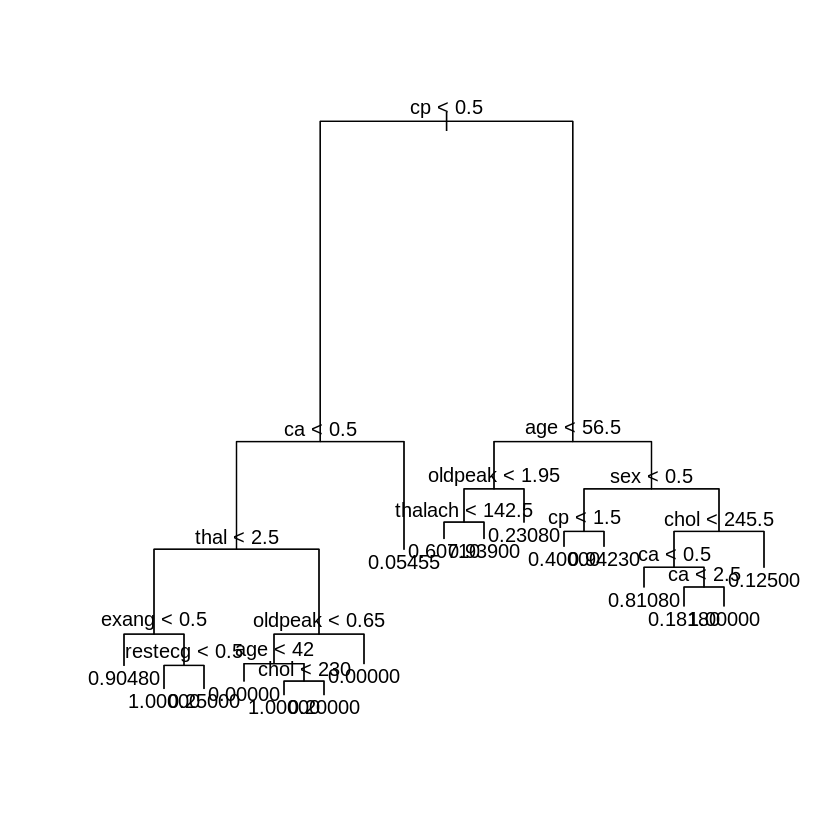

In [ ]:
# Decision tree model
tree_model = tree(target ~ ., data = train_data)

# Plotting the model
plot(tree_model)
text(tree_model, pretty=0)

In [ ]:
# Testing the model
predictions = predict(tree_model, newdata = test_data)
pred_bin = ifelse(predictions > 0.5, 1, 0)

# Confusion Matrix
conf_mat = table(pred_bin, test_data$target)
conf_mat

accuracy = (conf_mat[1,1] + conf_mat[2,2]) / sum(conf_mat)
accuracy

        
pred_bin  0  1
       0 91 21
       1  4 89

[1] 0.8780488

Using all data to train the decision tree yields an accuracy of .878 with a large tree of 17 nodes -> pruned to 14 nodes .8975 acc. When using just the most correlated variables (thalach + cp + exang + ca + slope) we get an accuracy of .848 with only a 7 node tree. Additionally, using the same features used in the logisitic regression model (sex + cp + trestbps + chol + restecg + thalach + exang + oldpeak + slope + ca + thal) yields a .868 accuracy with a 15 node tree.

In [ ]:
summary(tree_model)


Regression tree:
tree(formula = target ~ ., data = train_data)
Variables actually used in tree construction:
 [1] "cp"      "ca"      "thal"    "exang"   "restecg" "oldpeak" "age"    
 [8] "chol"    "thalach" "sex"    
Number of terminal nodes:  17 
Residual mean deviance:  0.07792 = 62.57 / 803 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.94230 -0.05455  0.00000  0.00000  0.06103  0.94550 

# **Pruning the Tree**

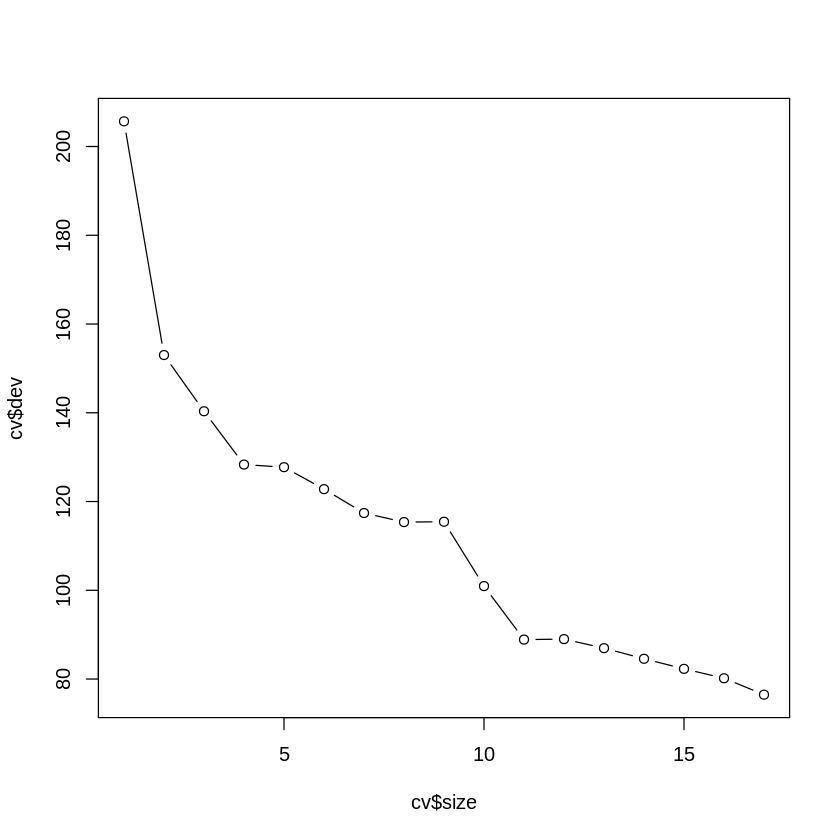

In [ ]:
# Obtaining the best number of branches
cv = cv.tree(tree_model)
plot(cv$size, cv$dev, type='b')

# **Pruned Tree Model**

In [ ]:
# Pruned tree model
prune_tree = prune.tree(tree_model, best = 14)

# Plotting the model
plot(prune_tree)
text(prune_tree, pretty=0)

In [ ]:
# Testing the model
predictions = predict(prune_tree, newdata = test_data)
pred_bin = ifelse(predictions > 0.5, 1, 0)

# Confusion Matrix
conf_mat = table(pred_bin, test_data$target)
conf_mat

accuracy = (conf_mat[1,1] + conf_mat[2,2]) / sum(conf_mat)
accuracy

In [ ]:
summary(prune_tree)